Reading the dataset as pandas dataframe

In [ ]:
import numpy as np
import pandas as pd

train_df = pd.read_csv("data/drugsComTrain_raw.tsv", sep='\t')
test_df = pd.read_csv("data/drugsComTest_raw.tsv", sep='\t')

train_df.sample(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
137674,56573,Elavil,Pain,"""Have been taking for over 1 week now and afte...",8,6-May-16,69
26200,120835,Antabuse,Alcohol Dependence,"""I&#039;ve been taking it for a week after a l...",10,2-Apr-17,20
14395,191371,Lisdexamfetamine,Binge Eating Disorde,"""I am using Vyance to help me lose weight.I ha...",5,29-Dec-16,24
62244,30786,Miconazole,Vaginal Yeast Infection,"""Tried the 7 day because why not. Nope. I feel...",1,28-Jun-17,6
39236,21048,Paliperidone,Schizoaffective Disorde,"""I knew within 48 hours that this drug was a g...",10,23-Jul-17,8
139179,5687,Loxapine,Schizophrenia,"""I switched to loxapine from risperidone becau...",6,8-Aug-16,2
145001,90438,Docosanol,Herpes Simplex,"""Abreva is by far the biggest waste of money I...",2,7-Dec-16,7
10676,26395,Sprintec,Birth Control,"""I started taking the pill about 4 years ago, ...",10,15-Jul-15,6
149819,181599,Prozac,Anxiety and Stress,"""I used fluoxetine specifically to tackle depr...",10,3-Mar-13,91
147988,42766,Xulane,Birth Control,"""I started the patch a month after having my d...",7,4-Sep-17,8


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [ ]:
train_df.rating.value_counts()

10    50989
9     27531
1     21619
8     18890
7      9456
5      8013
2      6931
3      6513
6      6343
4      5012
Name: rating, dtype: int64

Counts of all ratings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


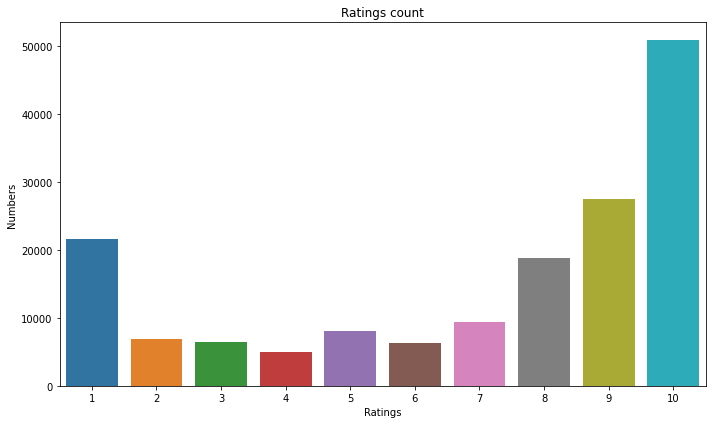

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title("Ratings count")
plt.xlabel("Ratings")
plt.ylabel("Numbers")
plt.xticks()

sns.barplot(train_df.rating.value_counts().index, train_df.rating.value_counts().values)
plt.tight_layout()
plt.savefig("Ratings Counts.png")

Appending drugName and condition on the review text

In [ ]:
train_df['review'] = train_df['drugName'] + " " + train_df['condition'] + " "+ train_df['review']
test_df['review'] = test_df['drugName'] + " " + test_df['condition'] + " "+ test_df['review']

DATA CLEANING

In [ ]:
import string

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import math
import sys

stop = stopwords.words('english')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
punct_to_remove = string.punctuation

train_df.review = train_df.review.astype('str')
test_df.review = test_df.review.astype('str')

EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Respect",
    u"_\(\._\.\)_":"Respect",
    u"<\(_ _\)>":"Respect",
    u"<m\(__\)m>":"Respect",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

def basic_cleaning(abs):
    # match any character that is not an uppercase or lowercase letter
    # and replace it with ' '
    abs = re.sub('[^a-zA-Z]', ' ', abs.lower())
    abs = abs.translate(str.maketrans('', '', punct_to_remove))
    
    abs = " ".join([lemmatizer.lemmatize(word) for word in str(abs).split() if word not in stop])
    # words = nltk.word_tokenize(abs)
    return abs.replace('/n', " ")

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    # replace all matches in text with empty string
    return emoji_pattern.sub(r'', text)

def convert_emoticons(text):
    # traverse through keys of EMOTICONS dict i.e. emojies
    for emot in EMOTICONS:
        # args in re.sub: pattern, replacement, string
        text = re.sub('(' + emot + ')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

def remove_urls(text):
    # match https:// or http:// followed by text or match www. followed by text
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_html(text):
    # non-greedy search of html tag to find the shortest possible match
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

train_df['review'] = train_df['review'].apply(lambda abs: convert_emoticons(abs))
train_df['review'] = train_df['review'].apply(lambda abs: remove_urls(abs))
train_df['review'] = train_df['review'].apply(lambda abs: remove_html(abs))
train_df['review'] = train_df['review'].apply(lambda abs: basic_cleaning(abs))

print("CLEANING DONE SAVING TRAINING DATA ...")
train_df.to_csv('cleaned_train.csv', index=False)
print("SAVED !!!")

test_df['review'] = test_df['review'].apply(lambda abs: convert_emoticons(abs))
test_df['review'] = test_df['review'].apply(lambda abs: remove_urls(abs))
test_df['review'] = test_df['review'].apply(lambda abs: remove_html(abs))
test_df['review'] = test_df['review'].apply(lambda abs: basic_cleaning(abs))

print("CLEANING DONE SAVING TESTING DATA ...")
train_df.to_csv('cleaned_test.csv', index=False)
print("SAVED !!!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
CLEANING DONE SAVING TRAINING DATA ...
SAVED !!!
CLEANING DONE SAVING TESTING DATA ...
SAVED !!!


In [ ]:
train_df.review.sample(5)

98860    proair respiclick asthma acute zero effectiven...
24983    linz irritable bowel syndrome well well let sa...
71323    bactrim d urinary tract infection third day me...
54617    bactrim bacterial skin infection first prescri...
72966    anastrozole breast cance took arimidex year re...
Name: review, dtype: object

Polarity check

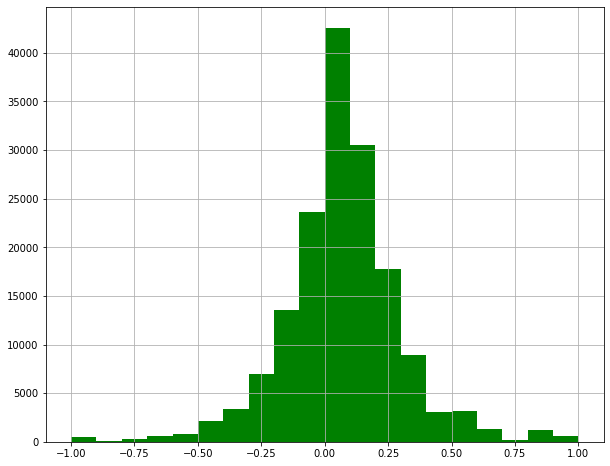

In [ ]:
from textblob import TextBlob, Word, Blobber

train_df['polarity'] = train_df['review'].map(lambda text: TextBlob(text).sentiment.polarity)
train_df['polarity'].hist(bins=20, figsize=(10, 8), color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


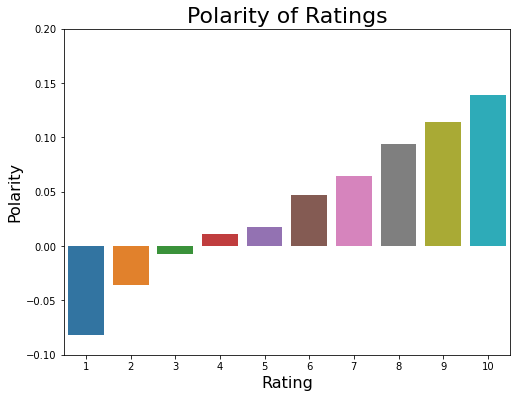

In [ ]:
mean_pol = train_df.groupby('rating')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(mean_pol.index, mean_pol.mean_polarity)

plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(-0.1, 0.20)
plt.show()

WordCloud

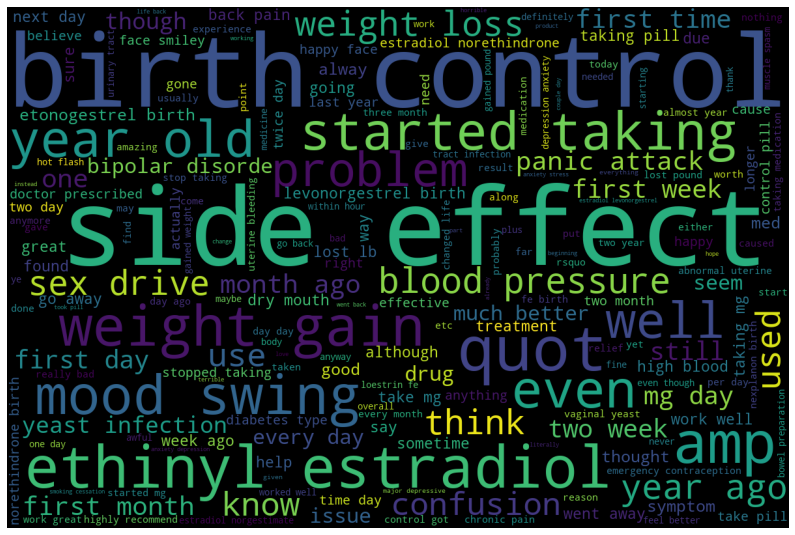

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in train_df.review)
stopwords = set(STOPWORDS)
wordcl = WordCloud(stopwords = stopwords, background_color='black', width = 1200, height = 800).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl)
plt.axis('off')
plt.show()

Useful Count vs Rating

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


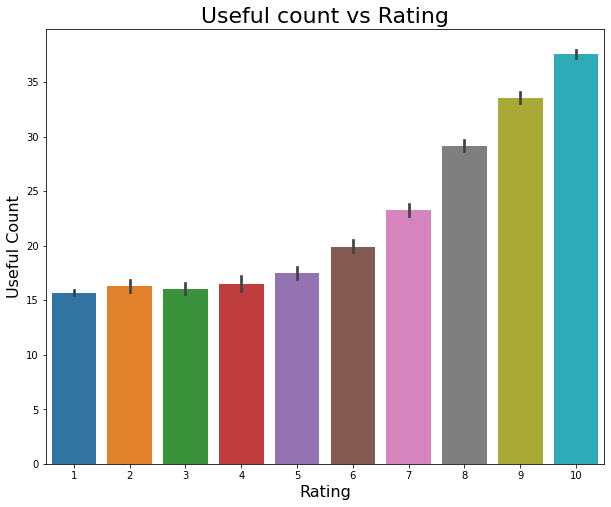

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot('rating', 'usefulCount', data=train_df)
plt.title("Useful count vs Rating", fontsize=22)
plt.ylabel("Useful Count", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.show()

Drugs with most rating of 10

Text(0.5, 1.0, 'Drugs with most rating of 10')

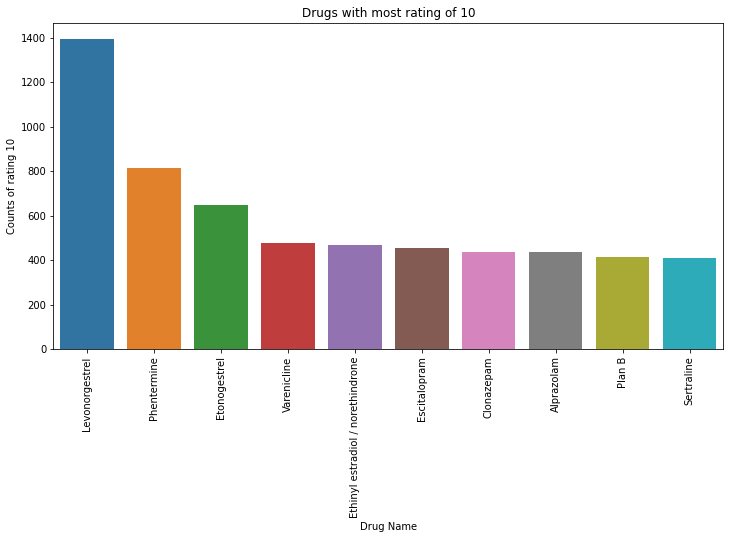

In [ ]:
# df.loc['row_label', 'column_label']
best_drugs = dict(train_df.loc[train_df.rating == 10, "drugName"].value_counts())
drugname = list(best_drugs.keys())
drug_10_counts = list(best_drugs.values())

plt.figure(figsize=(12, 6))
sns.barplot(x = drugname[0:10], y = drug_10_counts[0:10])
plt.xticks(rotation=90)
plt.xlabel('Drug Name')
plt.ylabel('Counts of rating 10')
plt.title('Drugs with most rating of 10')

Drugs with most rating of 1

Text(0.5, 1.0, 'Drugs with most rating of 1')

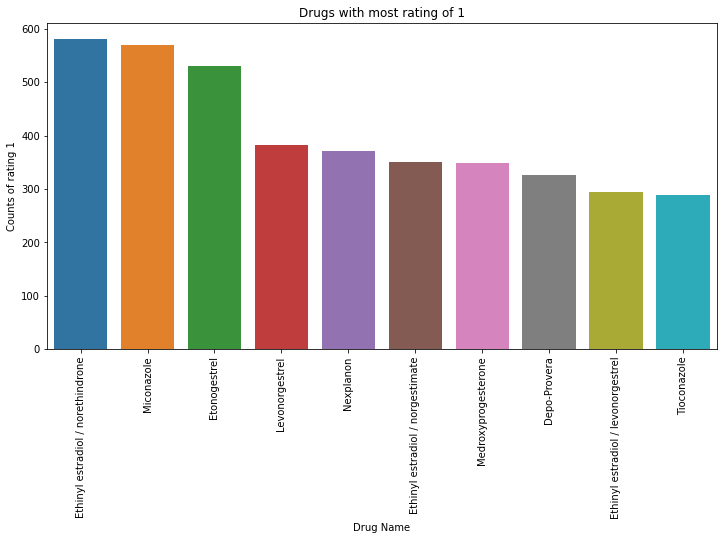

In [ ]:
worst_drugs = dict(train_df.loc[train_df.rating == 1, "drugName"].value_counts())
drugname = list(worst_drugs.keys())
drug_10_counts = list(worst_drugs.values())

plt.figure(figsize=(12, 6))
sns.barplot(x = drugname[0:10], y = drug_10_counts[0:10])
plt.xticks(rotation=90)
plt.xlabel('Drug Name')
plt.ylabel('Counts of rating 1')
plt.title('Drugs with most rating of 1')

Pie Chart Representation of Year of Review

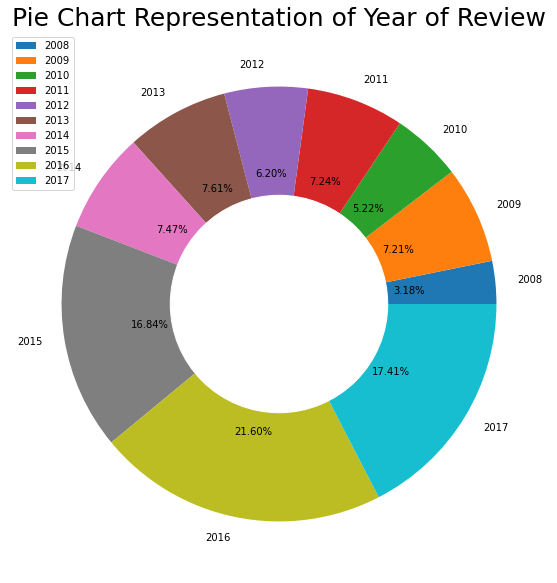

In [ ]:
train_df['date'] = pd.to_datetime(train_df['date'])
# .dt is datetime accessor that allows to access various components of a datetime
train_df['year'] = train_df['date'].dt.year

values = train_df.year.value_counts().sort_index().values.tolist()
labels = train_df.year.value_counts().sort_index().index.tolist()

circle_mid = plt.Circle((0, 0), 0.5, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(values, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Year of Review', fontsize = 25)
# add piechart to the plt
# gca = Get Current Axis
plt.gca().add_artist(circle_mid)
plt.legend()
plt.show()

Read the cleaned data

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('cleaned_train.csv')
test_df = pd.read_csv('cleaned_test.csv')

In [ ]:
# Drop NaN values if any
train_df.dropna(inplace=True)

X_train = train_df['review']
y_train = train_df['rating']
X_test = test_df['review']
y_test = test_df['rating']

# Convert ratings to only three categories i.e Positive, Neutral and Negative
def convert_rating(rating):
    if rating >= 8:
        return 2
    elif rating >=4:
        return 1
    else:
        return 0

y_test = y_test.apply(convert_rating)
y_train = y_train.apply(convert_rating)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([34848, 28635, 96915]))

Data Augmentation

In [ ]:
!pip install nlpaug

import nlpaug.augmenter.word as naw
import math

def augmentation_text(aug, df: pd.DataFrame, factor_to_aug: int, labels_to_aug: list):
    augmented_sentences=[]
    augmented_sentences_labels=[]

    for idx, row in df.iterrows():
        # row[1] is 0, 1 or 2 (i.e. neg, neutral or pos)
        # augmentation factor for each level is different so is separately done
        if row[1] in labels_to_aug:
            # row[0] is the actual review
            temps = aug.augment(row[0], n=factor_to_aug)
            # Iterating through the augmented sentences (excluding the original sentence)
            for sentences in temps[1:]:
                if factor_to_aug>1:
                    augmented_sentences.append(sentences)
                    augmented_sentences_labels.append(row[1])

    return augmented_sentences, augmented_sentences_labels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Data augmentation using synonyms

max_word_aug = 30
aug = naw.SynonymAug(aug_src='wordnet',aug_max=max_word_aug)

df = train_df[['review', 'rating']]
df['rating'] = y_train # 0, 1, 2 mapped ratings

# For label 1
sent, labels = augmentation_text(aug, df, factor_to_aug=2, labels_to_aug = [1])
df_aug = pd.DataFrame({'review': sent,
                       'rating': labels})

df = pd.concat([df, df_aug])

print("1/2 augmentation done")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1/2 augmentation done


In [ ]:
y_train.value_counts()

2    96915
1    57270
0    34848
Name: rating, dtype: int64

In [ ]:
# For label 0

sent, labels = augmentation_text(aug, df, factor_to_aug=2, labels_to_aug = [0])
df_aug = pd.DataFrame({'review': sent,
                       'rating': labels})

df = pd.concat([df, df_aug])

print("2/2 augmentation done")

# 5% accuracy increased

2/2 augmentation done


In [ ]:
y_train.value_counts()

2    96915
0    69696
1    57270
Name: rating, dtype: int64

In [ ]:
import os
if 'Augmented.csv' in os.listdir():
    print('xa')

xa


CHECKPOINT IF NOTEBOOK RESTARTS

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if 'Augmented.csv' not in os.listdir():
    df.to_csv('Augmented.csv', index=False)

df = pd.read_csv('/content/Augmented.csv')
X_train = df['review']
y_train = df['rating']

test_df = pd.read_csv('cleaned_test.csv')
X_test = test_df['review']
y_test = test_df['rating']

def convert_rating(rating):
    if rating >= 8:
        return 2
    elif rating >=4:
        return 1
    else:
        return 0

y_test = y_test.apply(convert_rating)

Feature Extraction

In [ ]:
# TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer

# in sublinear_tf, term frequency is replaced with 1 + log(TF)
# reducing effect of TF for highly occuring word in a document
tfidf = TfidfVectorizer(max_features=200000, sublinear_tf=True, 
                        stop_words='english', dtype='float32')
tfidf.fit(X_train)
# 'U' indicates that the data type should be Unicode string
X_train_tfidf = tfidf.transform(X_train.values.astype('U'))
X_test_tfidf = tfidf.transform(X_test.values.astype('U'))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  UserWarning,


Sampling

In [ ]:
# Using RandomUnderSampler

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=77)
X_rus, y_rus = rus.fit_resample(X_train_tfidf, y_train)

In [ ]:
np.unique(y_rus, return_counts=True)

(array([0, 1, 2]), array([57270, 57270, 57270]))

COUNT VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train.values.astype('U'))
X_test_cv = cv.transform(X_test.values.astype('U'))

rus = RandomUnderSampler(random_state=77)
X_rus, y_rus = rus.fit_resample(X_train_cv, y_train)

Models Training

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMModel, LGBMClassifier

from sklearn.metrics import f1_score, confusion_matrix

# LinearSVC = SVC with linear kernel, for linearly separable data, just trying
# MultinomialNB = NB classifier commonly used for document classification, such as text classification
# 'multinomial' in text classification models the occurrence counts of words in a document
models = [LogisticRegression(), LinearSVC(random_state=77), MultinomialNB()]

def model_train(model, X_train, y_train, X_test, y_test):
    mod = model.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    # taking micro f1 score which is more robust than macro and weighted
    score = f1_score(y_pred, y_test, average='micro')

    print("*"*80)
    print(f'{model}\n')
    print("Score: ", score)
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

for model in models:
    model_train(model, X_rus, y_rus, X_test_cv, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


********************************************************************************
LogisticRegression()

Score:  0.769164956570798
Confusion Matrix: 
 [[26128  4155  4780]
 [ 4470 15774  8580]
 [ 5977  9271 82162]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


********************************************************************************
LinearSVC(random_state=77)

Score:  0.8381247016373522
Confusion Matrix: 
 [[30011  2382  2670]
 [ 3425 20448  4951]
 [ 5249  7433 84728]]
********************************************************************************
MultinomialNB()

Score:  0.7074899099177294
Confusion Matrix: 
 [[20647  3910 10506]
 [ 4243 11109 13472]
 [ 5358  9692 82360]]


Best Model

In [ ]:
mod = LinearSVC(random_state=77).fit(X_rus, y_rus)
y_pred = mod.predict(X_test_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Classwise heatmap

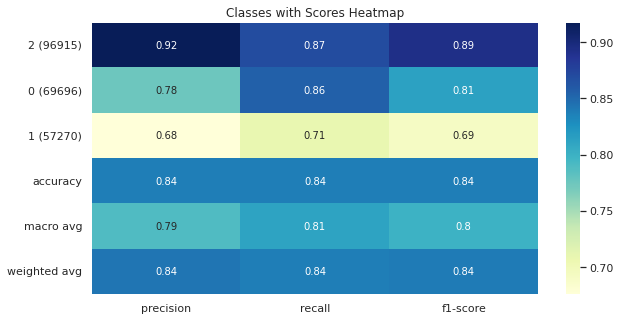

In [ ]:
from sklearn.metrics import classification_report

# generate report in the form of a dictionary
clf_report = classification_report(y_test, y_pred, output_dict=True)

# exclude the 'support' row (last row) which just contains the number of occurrences of each class in y_test
cls_df = pd.DataFrame(clf_report).iloc[:-1, :].T
acc_to_counts = [str(i) for i in y_train.value_counts().index] + ['accuracy', 'macro avg', 'weighted avg']
cls_df = cls_df.reindex(acc_to_counts)
# make the index label (count) for first three
acc_to_counts = [f"{i} ({y_train.value_counts()[i]})" for i in y_train.value_counts().index] + ['accuracy', 'macro avg', 'weighted avg']

cls_df.index = acc_to_counts

sns.set(rc = {'figure.figsize':(10, 5)})
sns.heatmap(cls_df, annot=True, annot_kws={'size': 10}, cmap="YlGnBu")
plt.title('Classes with Scores Heatmap') 
plt.savefig('Classes with Scores Heatmap.png', dpi=200, format='png', bbox_inches='tight')